In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd

In [2]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [3]:
# Import the data 
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Snapshot_date_delta,Checkin_date_delta,WeekDay,DayDiff,Discount Code,Hotel Name cat
0,0,0.0,25.0,2,26,1,35
1,1,0.0,32.0,2,33,1,35
2,2,0.0,26.0,3,27,1,482
3,3,0.0,8.0,6,9,1,127
4,4,0.0,25.0,2,26,1,127


In [4]:
df.drop(columns = ['Unnamed: 0'], axis=1, inplace = True)
df

,Snapshot_date_delta,Checkin_date_delta,WeekDay,DayDiff,Discount Code,Hotel Name cat
0,0.0,25.0,2,26,1,35
1,0.0,32.0,2,33,1,35
2,0.0,26.0,3,27,1,482
3,0.0,8.0,6,9,1,127
4,0.0,25.0,2,26,1,127
5,0.0,20.0,4,21,1,163
6,0.0,22.0,6,23,1,163
7,0.0,25.0,2,26,1,163
8,0.0,26.0,3,27,1,163
9,0.0,4.0,2,5,1,197


In [5]:
X = df[['Snapshot_date_delta','Checkin_date_delta','DayDiff','WeekDay','Hotel Name cat']]
Y = df["Discount Code"]

In [18]:
#descriptions
print(df.describe())

       Snapshot_date_delta  Checkin_date_delta        WeekDay        DayDiff  \
count        187848.000000       187848.000000  187848.000000  187848.000000   
mean             79.980745           96.446430       2.917763      17.465685   
std              46.982385           47.588446       1.840536      10.040225   
min               0.000000            0.000000       0.000000       1.000000   
25%              39.000000           55.000000       2.000000       9.000000   
50%              81.000000           98.000000       3.000000      18.000000   
75%             115.000000          131.000000       4.000000      26.000000   
max             168.000000          201.000000       6.000000      34.000000   

       Discount Code  Hotel Name cat  
count  187848.000000   187848.000000  
mean        2.434186      289.105655  
std         1.005191      146.185570  
min         1.000000        0.000000  
25%         2.000000      176.000000  
50%         2.000000      285.000000  
75%   

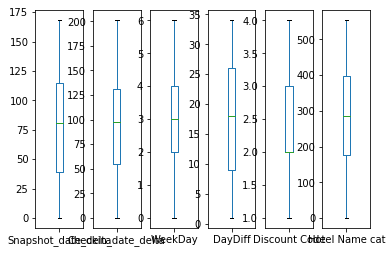

In [27]:
# box and whisker plots
df.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

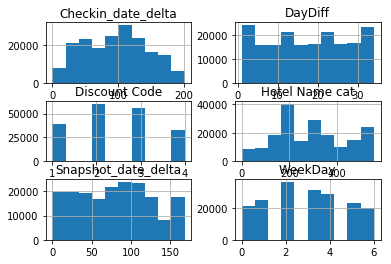

In [28]:
# histograms
df.hist()
plt.show()

In [33]:
from sklearn import model_selection
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [34]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [36]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.335926 (0.009300)
KNN: 0.347488 (0.023458)
CART: 0.416150 (0.029112)
NB: 0.338199 (0.009769)


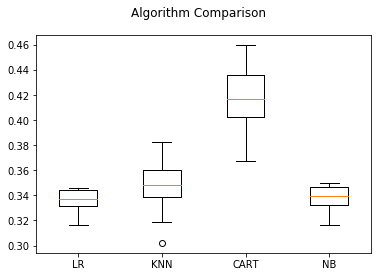

In [37]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
logreg = LogisticRegression()

C:\Users\naama.zecharia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.4, random_state=3)
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
from sklearn import metrics
Y_pred = logreg.predict(X_test)

In [15]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.3377961139206814
